In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_curve,\
confusion_matrix, auc, precision_recall_curve,balanced_accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

In [2]:
#importing data
data = pd.read_csv('/Users/abhijitdeshpande/Downloads/Case Study Data.csv')

In [3]:
#checking null values in data
data.isnull().sum()

age               3744
job                  0
marital              0
education            0
default              0
housing              0
loan                 0
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx    5148
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [4]:
#checking data type, categorical features in data
categorical_features, numerical_features = [],[]
for i,column in enumerate(data.columns):
    if data[column].dtype=='O': print(i,column,data[column].unique()), categorical_features.append(column)
    else: print(i,column,'Numerical data'), numerical_features.append(column)

0 age Numerical data
1 job ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
2 marital ['married' 'single' 'divorced' 'unknown']
3 education ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
4 default ['no' 'unknown' 'yes']
5 housing ['no' 'yes' 'unknown']
6 loan ['no' 'yes' 'unknown']
7 contact ['telephone' 'cellular']
8 month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
9 day_of_week ['mon' 'tue' 'wed' 'thu' 'fri']
10 duration Numerical data
11 campaign Numerical data
12 pdays Numerical data
13 previous Numerical data
14 poutcome ['nonexistent' 'failure' 'success']
15 emp.var.rate Numerical data
16 cons.price.idx Numerical data
17 cons.conf.idx Numerical data
18 euribor3m Numerical data
19 nr.employed Numerical data
20 y ['no' 'yes']


In [5]:
#Label encoding for ordinal categorical features and Onehot encoding for nominal features
encoding = LabelEncoder()

In [6]:
#job, education, default, housing, loan, poutcome are orndincal categorical features
#these features comes with order and have meaningful representation for each label so need to
#use label encding to preserve that order
data['job'] = encoding.fit_transform(data['job'])
data['education'] = encoding.fit_transform(data['education'])
data['default'] = encoding.fit_transform(data['default'])
data['housing'] = encoding.fit_transform(data['housing'])
data['loan'] = encoding.fit_transform(data['loan'])
data['poutcome'] =  encoding.fit_transform(data['poutcome'])

In [7]:
#these features does not add any more information in data
data = data.drop(['contact','month','day_of_week','duration'],axis=1)

In [8]:
#it is nominal feature and used onehot encoding to convert it in numerical format
data['marital'] = data['marital'].apply(lambda x:1 if x=='married' else 0)

In [9]:
data_copy = data.dropna()

In [10]:
label = data['y'].apply(lambda x: 1 if x=='yes' else 0)

In [11]:
data = data.drop('y',axis=1)

In [12]:
data.describe()

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,37444.000000,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,36040.000000,41188.000000,41188.000000,41188.000000
mean,39.999947,3.72458,0.605225,3.747184,0.208872,1.071720,0.327425,2.567593,962.475454,0.172963,0.930101,0.081886,93.575575,-40.502600,3.621291,5167.035911
std,10.414908,3.59456,0.488808,2.136482,0.406686,0.985314,0.723616,2.770014,186.910907,0.494901,0.362886,1.570960,0.579216,4.628198,1.734447,72.251528
min,17.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,0.00000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,999.000000,0.000000,1.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,2.00000,1.000000,3.000000,0.000000,2.000000,0.000000,2.000000,999.000000,0.000000,1.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,7.00000,1.000000,6.000000,0.000000,2.000000,0.000000,3.000000,999.000000,0.000000,1.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,11.00000,1.000000,7.000000,2.000000,2.000000,2.000000,56.000000,999.000000,7.000000,2.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [13]:
numerical_features

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [14]:
numerical_features.remove('duration')

In [15]:
correlation = data[numerical_features].corr()

<AxesSubplot:>

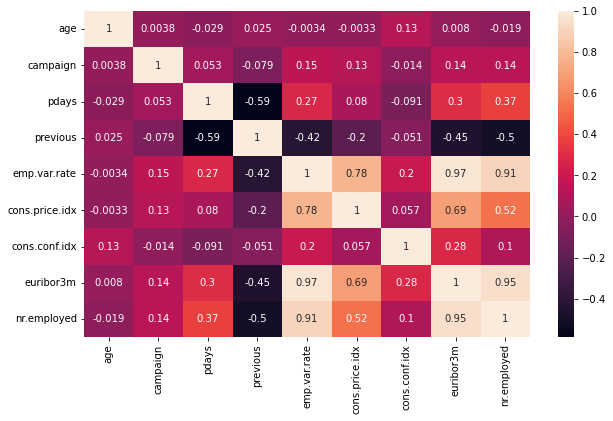

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation,xticklabels=numerical_features,yticklabels=numerical_features,
           annot=True)

<AxesSubplot:xlabel='euribor3m', ylabel='nr.employed'>

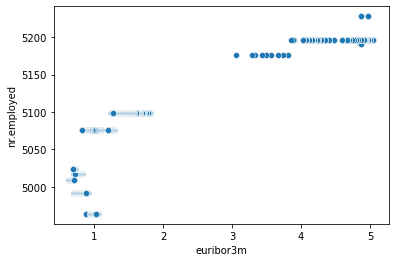

In [17]:
sns.scatterplot(x=data['euribor3m'],y=data['nr.employed'])

In [18]:
# for column in numerical_features:
#     try:
#         if data[column].dtype !='O':
#             print(column)
#             sns.boxplot(data[column])
#             plt.show()
#     except: pass

In [19]:
x_train, x_test, y_train, y_test = train_test_split(data,label,test_size=0.2,random_state=1)

In [20]:
x_train.isnull().sum()

age               3028
job                  0
marital              0
education            0
default              0
housing              0
loan                 0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx    4085
cons.conf.idx        0
euribor3m            0
nr.employed          0
dtype: int64

In [21]:
x_train['age'] = x_train['age'].replace(np.nan,x_train['age'].mean())
x_test['age'] = x_test['age'].replace(np.nan,x_test['age'].mean())

In [22]:
x_train.isnull().sum()

age                  0
job                  0
marital              0
education            0
default              0
housing              0
loan                 0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx    4085
cons.conf.idx        0
euribor3m            0
nr.employed          0
dtype: int64

In [23]:
x_train['cons.price.idx'] = x_train['cons.price.idx'].replace(np.nan,x_train['cons.price.idx'].mean())
x_test['cons.price.idx'] = x_test['cons.price.idx'].replace(np.nan,x_test['cons.price.idx'].mean())

In [24]:
#scaling data to make all features at same scale
#after scaling using pca to remove multicollinearity and relation

In [25]:
scale = StandardScaler()

In [26]:
scale.fit(x_train)

StandardScaler()

In [27]:
x_train = scale.transform(x_train)

In [28]:
x_test = scale.transform(x_test)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [30]:
#Using Optuna to tune the parameters

In [31]:
def objective(trial):
    
    clf = trial.suggest_categorical('Classifier',['Logistic'])#,'RandomForest'])
    
    if clf=='RandomForest':
        n_estimators=trial.suggest_int('n_estimators',10,500)
        max_depth=trial.suggest_int('max_depth',1,20,log=True)
        max_features=trial.suggest_int('max_features',1,20)

        clf = RandomForestClassifier(n_estimators,max_depth=max_depth,
                                   max_features=max_features)
    
    elif clf=='svm':
        C = trial.suggest_float('C',1e-5,1e5,log=True)   
        clf = SVC(kernel='rbf',C=C,gamma='auto')
    
    elif clf=='Logistic':
        solver = trial.suggest_categorical('solver',['liblinear','saga','sag','lbfgs'])
        C = trial.suggest_float('C',1e-5,1e5,log=True)
        clf = LogisticRegression(C=C,solver=solver)
        
    return cross_val_score(clf, x_train, y_train, cv=10,scoring='recall').mean()


import optuna

In [32]:
study = optuna.create_study(direction='maximize')

[I 2022-06-07 18:28:55,453] A new study created in memory with name: no-name-30c8439e-a56c-4a0e-bfe8-09601a14166e


In [33]:
study.optimize(objective,n_trials=100)

[I 2022-06-07 18:28:56,522] Trial 0 finished with value: 0.1834490588149125 and parameters: {'Classifier': 'Logistic', 'solver': 'sag', 'C': 49129.82462908343}. Best is trial 0 with value: 0.1834490588149125.
[I 2022-06-07 18:28:57,238] Trial 1 finished with value: 0.1788500695817769 and parameters: {'Classifier': 'Logistic', 'solver': 'saga', 'C': 0.0008487583162922637}. Best is trial 0 with value: 0.1834490588149125.
[I 2022-06-07 18:28:58,299] Trial 2 finished with value: 0.1834490588149125 and parameters: {'Classifier': 'Logistic', 'solver': 'sag', 'C': 462.79922802980764}. Best is trial 0 with value: 0.1834490588149125.
[I 2022-06-07 18:29:00,248] Trial 3 finished with value: 0.1834490588149125 and parameters: {'Classifier': 'Logistic', 'solver': 'liblinear', 'C': 7.103839501932902}. Best is trial 0 with value: 0.1834490588149125.
[I 2022-06-07 18:29:01,280] Trial 4 finished with value: 0.1834490588149125 and parameters: {'Classifier': 'Logistic', 'solver': 'sag', 'C': 102.9849207

[I 2022-06-07 18:29:13,400] Trial 36 finished with value: 0.0 and parameters: {'Classifier': 'Logistic', 'solver': 'saga', 'C': 1.053402378064676e-05}. Best is trial 16 with value: 0.45968724822383356.
[I 2022-06-07 18:29:13,717] Trial 37 finished with value: 0.18696403720793967 and parameters: {'Classifier': 'Logistic', 'solver': 'liblinear', 'C': 0.003201126065732494}. Best is trial 16 with value: 0.45968724822383356.
[I 2022-06-07 18:29:13,967] Trial 38 finished with value: 0.2037361751995898 and parameters: {'Classifier': 'Logistic', 'solver': 'liblinear', 'C': 0.0005045595628683247}. Best is trial 16 with value: 0.45968724822383356.
[I 2022-06-07 18:29:14,479] Trial 39 finished with value: 0.0 and parameters: {'Classifier': 'Logistic', 'solver': 'sag', 'C': 4.223926123971181e-05}. Best is trial 16 with value: 0.45968724822383356.
[I 2022-06-07 18:29:14,886] Trial 40 finished with value: 0.1834490588149125 and parameters: {'Classifier': 'Logistic', 'solver': 'lbfgs', 'C': 10890.909

[I 2022-06-07 18:29:23,198] Trial 72 finished with value: 0.3806782392148246 and parameters: {'Classifier': 'Logistic', 'solver': 'liblinear', 'C': 2.1046622239592908e-05}. Best is trial 45 with value: 0.460228521204131.
[I 2022-06-07 18:29:23,383] Trial 73 finished with value: 0.46076906174467147 and parameters: {'Classifier': 'Logistic', 'solver': 'liblinear', 'C': 1.0101742050460722e-05}. Best is trial 73 with value: 0.46076906174467147.
[I 2022-06-07 18:29:23,574] Trial 74 finished with value: 0.29220391122830147 and parameters: {'Classifier': 'Logistic', 'solver': 'liblinear', 'C': 4.063778251414109e-05}. Best is trial 73 with value: 0.46076906174467147.
[I 2022-06-07 18:29:23,990] Trial 75 finished with value: 0.1834490588149125 and parameters: {'Classifier': 'Logistic', 'solver': 'liblinear', 'C': 2682.6606142023998}. Best is trial 73 with value: 0.46076906174467147.
[I 2022-06-07 18:29:24,199] Trial 76 finished with value: 0.20508825899069802 and parameters: {'Classifier': 'Log

In [34]:
study.best_params

{'Classifier': 'Logistic', 'solver': 'liblinear', 'C': 1.0101742050460722e-05}

In [35]:
log = LogisticRegression(C=1e-5,solver='liblinear',class_weight='balanced')
rf = RandomForestClassifier(n_estimators= 100,max_depth= 2,max_features= 5,class_weight='balanced')

### Using Logistic Regression

In [36]:
log.fit(x_train,y_train)

LogisticRegression(C=1e-05, class_weight='balanced', solver='liblinear')

In [37]:
print(classification_report(y_test,log.predict(x_test[:,:])))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82      7294
           1       0.25      0.72      0.38       944

    accuracy                           0.72      8238
   macro avg       0.60      0.72      0.60      8238
weighted avg       0.87      0.72      0.77      8238



In [38]:
accuracy_score(log.predict(x_test[:,:]),y_test)

0.7248118475358096

In [39]:
probs = log.predict_proba(x_test[:,:])[:,1]

In [40]:
fpr,tpr,_ = roc_curve(y_test,probs)

0.769348239556078

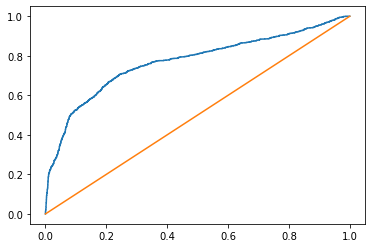

In [41]:
plt.plot(fpr,tpr)
plt.plot([0,1])
auc(fpr,tpr)

In [42]:
cm = confusion_matrix(y_test,log.predict(x_test))

In [43]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          color='viridis'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    from sklearn.metrics import classification_report, confusion_matrix
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=color)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[5287 2007]
 [ 260  684]]


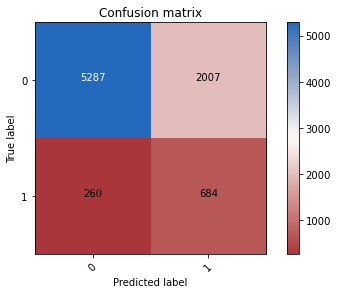

In [44]:
plot_confusion_matrix(cm,[0,1],color='vlag_r')

### Using RandomForest

In [45]:
rf.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=2, max_features=5)

In [46]:
print(classification_report(y_test,rf.predict(x_test[:,:])))

              precision    recall  f1-score   support

           0       0.95      0.73      0.82      7294
           1       0.26      0.72      0.38       944

    accuracy                           0.73      8238
   macro avg       0.60      0.73      0.60      8238
weighted avg       0.87      0.73      0.77      8238



In [47]:
accuracy_score(rf.predict(x_test[:,:]),y_test)

0.7260257344015538

In [48]:
probs = rf.predict_proba(x_test[:,:])[:,1]

In [49]:
fpr,tpr,_ = roc_curve(y_test,probs)

0.7921472634810129

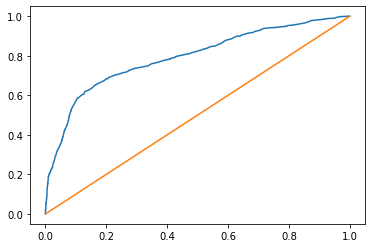

In [50]:
plt.plot(fpr,tpr)
plt.plot([0,1])
auc(fpr,tpr)

## After Using SMOTE

In [51]:
from imblearn.over_sampling import SMOTE

In [52]:
oversampling = SMOTE()

In [53]:
x, y = oversampling.fit_resample(x_train, y_train)

### Using Logistic Regression

In [54]:
log.fit(x,y)
print(classification_report(y_test,log.predict(x_test)))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82      7294
           1       0.25      0.72      0.38       944

    accuracy                           0.72      8238
   macro avg       0.60      0.72      0.60      8238
weighted avg       0.87      0.72      0.77      8238



In [55]:
print(confusion_matrix(y_test,log.predict(x_test)))

[[5288 2006]
 [ 260  684]]


In [56]:
cm = confusion_matrix(y_test,log.predict(x_test))

Confusion matrix, without normalization
[[5288 2006]
 [ 260  684]]


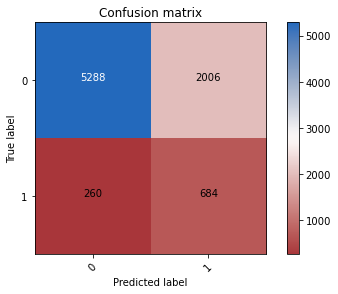

In [57]:
plot_confusion_matrix(cm,[0,1],color='vlag_r')

In [58]:
fpr,tpr,_=roc_curve(y_test,log.predict_proba(x_test)[:,1])

0.7713585405696811

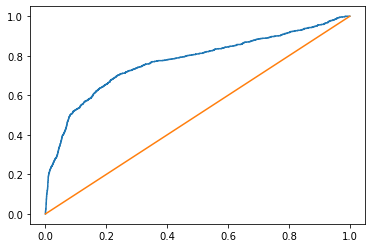

In [59]:
plt.plot(fpr,tpr)
plt.plot([0,1])
auc(fpr,tpr)

### Using Random Forest 

In [60]:
rf.fit(x,y)
print(classification_report(y_test,rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.95      0.76      0.84      7294
           1       0.27      0.70      0.39       944

    accuracy                           0.75      8238
   macro avg       0.61      0.73      0.62      8238
weighted avg       0.87      0.75      0.79      8238



In [61]:
print(confusion_matrix(y_test,rf.predict(x_test)))

[[5513 1781]
 [ 284  660]]


In [62]:
cm = confusion_matrix(y_test,rf.predict(x_test))

Confusion matrix, without normalization
[[5513 1781]
 [ 284  660]]


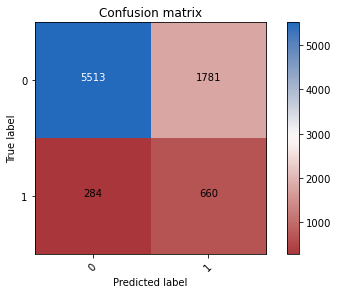

In [63]:
plot_confusion_matrix(cm,[0,1],color='vlag_r')

In [64]:
fpr,tpr,_=roc_curve(y_test,rf.predict_proba(x_test)[:,1])

0.789338840142583

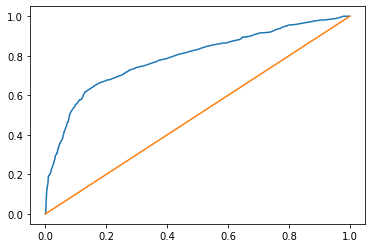

In [65]:
plt.plot(fpr,tpr)
plt.plot([0,1])
auc(fpr,tpr)

## Using Neural Network

In [66]:
x_train, x, y_train, y = train_test_split(data,label,test_size=0.3,random_state=1)

In [67]:
#filling nan values with mean
x_train['age'] = x_train['age'].replace(np.nan,x_train['age'].mean())
x['age'] = x['age'].replace(np.nan,x['age'].mean())

x_train['cons.price.idx'] = x_train['cons.price.idx'].replace(np.nan,x_train['cons.price.idx'].mean())
x['cons.price.idx'] = x['cons.price.idx'].replace(np.nan,x['cons.price.idx'].mean())

In [68]:
x_val, x_test, y_val, y_test = train_test_split(x,y,test_size=0.5,random_state=1)

In [69]:
scale = StandardScaler()
scale.fit(x_train)
x_train = scale.transform(x_train)
x_val = scale.transform(x_val)
x_test = scale.transform(x_test)

In [70]:
x, y = oversampling.fit_resample(x_train, y_train)

In [71]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [72]:
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [73]:
class train_data(Dataset):
    
    def __init__(self):
        self.length = len(x_train)
        self.data = x
        self.labels = y
    
    def __getitem__(self, index):
        return self.data[index], self.labels[index]
    
    def __len__(self):
        return self.length

class val_data(Dataset):
    
    def __init__(self):
        self.length = len(x_val)
        self.data = x_val
        self.labels = y_val
    
    def __getitem__(self, index):
        return self.data[index], self.labels[index]
    
    def __len__(self):
        return self.length

class test_data(Dataset):
    
    def __init__(self):
        self.length = len(x_test)
        self.data = x_test
        self.labels = y_test
    
    def __getitem__(self, index):
        return self.data[index], self.labels[index]
    
    def __len__(self):
        return self.length

In [74]:
x_train = train_data()
x_val = val_data()
x_test = test_data()
train_loader = DataLoader(dataset=x_train, batch_size=128, shuffle=True)
val_loader = DataLoader(dataset=x_val, batch_size=128, shuffle=True)
test_loader = DataLoader(dataset=x_test, batch_size=10000, shuffle=True)

In [75]:
class NeuralNet(nn.Module):
    
    def __init__(self, input_size, hidden_size, nclass, activation):
        super(NeuralNet,self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, hidden_size)
        self.linear3 = nn.Linear(hidden_size, hidden_size)
        self.activation = activation()
        self.output = nn.Linear(hidden_size, nclass)
        
    def forward(self,x):
        out = self.linear1(x)
        out = self.activation(out)
        out = self.linear2(out)
        out = self.activation(out)
        #out = self.linear3(out)
        #out = self.activation(out)
        out = self.output(out)
        
        return out    

In [76]:
class train_model():
    
    def __init__(self,model):
        self.model = model
        self.validation_loss = []
        self.training_loss = []
        
    def compile(self, lr=1e-3, loss=nn.CrossEntropyLoss(),optimizer=torch.optim.Adam):  
        self.loss_module = loss
        self.optimizer = optimizer(self.model.parameters(),lr=lr)

   
    def fit(self, train_loader):

        self.model = self.model.train()
        total_loss = 0
        total_batch_accuracy = 0

        for i, batch in enumerate(train_loader):
            x_train, y_train = batch
            prediction = self.model(x_train.float())
            loss = self.loss_module(prediction, y_train)
            self.optimizer.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=4.0)
            self.optimizer.step()

            total_loss += loss
            mean_batch_loss = total_loss/(i+1)

            predictions = torch.argmax(prediction, 1)
            batch_accuracy = accuracy_score(y_train, predictions)

            
            total_batch_accuracy += batch_accuracy 
            mean_bach_accuracy = total_batch_accuracy/(i+1)
            
        return mean_batch_loss.detach().numpy(), mean_bach_accuracy
        
    def evaluate(self, train_loader):

        total_batch_accuracy = 0
        total_loss = 0
        batch_auc = []
        self.model = self.model.eval()
            
        for i, batch in enumerate(train_loader):
            x_test, y_test = batch
            prediction = self.model(x_test.float())
            probs = nn.Softmax()(prediction).detach().numpy()
            loss = self.loss_module(prediction, y_test)

            total_loss += loss
            mean_batch_loss = total_loss/(i+1)

            predictions = torch.argmax(prediction, 1)
            batch_accuracy = accuracy_score(y_test, predictions)
            
            precision, recall,_ = precision_recall_curve(y_test,probs[:,1])
            auc_ = auc(recall,precision)
            batch_auc.append(auc_)

            total_batch_accuracy += batch_accuracy 
            mean_bach_accuracy = total_batch_accuracy/(i+1)
        total_auc = np.nansum(batch_auc)/len(batch_auc)

        return mean_batch_loss.detach().numpy(), total_auc, mean_bach_accuracy
         
    def train(self,train_data,val_data,epochs=100,batch_size=7,verbose=True,return_loss=True,metric=False,early_stopping=10):
               
        best_loss = np.inf
        early_stop_counter = 0
        self.batch_size = 2**batch_size
        
        for epoch in range(epochs):
    
            loss, batch_accuracy = self.fit(train_data)
            val_loss, auc_, val_batch_accuracy = self.evaluate(val_data)
            
            self.training_loss.append(loss)
            self.validation_loss.append(val_loss)
           
            if val_loss < best_loss:
                best_loss = val_loss
                
            else:early_stop_counter+=1
            
            if early_stop_counter>early_stopping:
                break
            
            if verbose:
                print('\033[94m'+'Epoch: {}'.format(epoch)+'\033[0m'+' {}%'.format(round(batch_accuracy*100,3)),
                  '\033[91m'+'loss:'+'\033[0m'+' {}'.format(round(float(loss),4)),
                  '\033[94m Val:'+'\033[0m'+' {}'.format(round(val_batch_accuracy*100,3)),
                  '\033[91m'+'val_loss:'+'\033[0m'+' {}'.format(round(float(val_loss),4))
                 )
      

        if return_loss:
            plt.plot(self.training_loss)
            plt.plot(self.validation_loss)
            plt.legend()
        
        if metric:
            return best_loss.item(), auc_
        
    def analyze(self,train_loader,color='viridis',return_prob=False):
        self.model = self.model.eval()
        
        for i, batch in enumerate(train_loader):
            x_test, y_test = batch
            prediction = self.model(x_test.float())
            probs = nn.Softmax()(prediction).detach().numpy()
            
            predictions = torch.argmax(prediction,1)
            accuracy = accuracy_score(predictions, y_test)
            balanced_accuracy = balanced_accuracy_score(predictions, y_test)
            print('\033[92m'+'\nAccuracy: '+'\033[0m',accuracy)
            print('\033[92m'+'\nBalanced Accuracy: '+'\033[0m',balanced_accuracy)
            print('\n'+'\033[0m'+         'Classification Report:\n')
            print(classification_report(y_test,predictions))
            print('\n'+'\033[0m'+         'Confusion Matrix:\n')
            cm = confusion_matrix(y_test,predictions)
            print('\033[91m'+' '*12+'Total Data Samples:'+'\033[0m', len(y_test),'\n')
            print('\033[94m'+' '*12+'Class 0:'+'\033[0m',(torch.unique(y_test, return_counts=True)[1][0]).item())
            print('\033[94m'+' '*12+'Class 1:'+'\033[0m',(torch.unique(y_test, return_counts=True)[1][1]).item(),'\n'+'\033[0m')

            plot_confusion_matrix(cm,[0,1],color=color)

            print('\n')

            try:
                precision, recall,_ = precision_recall_curve(y_test,probs[:,1])
                #roc_auc = roc_auc_score(y_test,prediction[:,1])
                auc_ = auc(recall,precision)
                plt.figure()
                plt.plot(recall, precision, label='(Area = {:.3f})'.format(auc_))
                #plt.plot([0,1],marker='.')
                plt.xlabel('False positive rate')
                plt.ylabel('True positive rate')
                plt.title('ROC curve')
                plt.legend(loc='best')
                plt.show()

            except Exception as e:print(e)
            if return_prob: return probs
        

In [77]:
input_size = data.shape[1]
hidden_size = 256
n_class = 2

In [78]:
model = NeuralNet(input_size,hidden_size,n_class,nn.ReLU)

In [79]:
torch.manual_seed(10)
model_train = train_model(model)

In [80]:
model_train.compile(lr=1e-5)

Epoch: 0 88.801% loss: 0.5005  Val: 88.663 val_loss: 0.4349
Epoch: 1 88.812% loss: 0.3924  Val: 88.707 val_loss: 0.3588
Epoch: 2 88.888% loss: 0.3368  Val: 89.049 val_loss: 0.3195
Epoch: 3 89.694% loss: 0.3086  Val: 89.711 val_loss: 0.3028
Epoch: 4 90.061% loss: 0.2956  Val: 89.799 val_loss: 0.2929
Epoch: 5 90.089% loss: 0.2908  Val: 89.915 val_loss: 0.2883
Epoch: 6 90.102% loss: 0.2888  Val: 89.871 val_loss: 0.287
Epoch: 7 90.053% loss: 0.2883  Val: 89.931 val_loss: 0.2858
Epoch: 8 90.091% loss: 0.2872  Val: 89.843 val_loss: 0.2864
Epoch: 9 90.103% loss: 0.286  Val: 89.799 val_loss: 0.2878
Epoch: 10 90.067% loss: 0.2864  Val: 89.975 val_loss: 0.2826
Epoch: 11 90.077% loss: 0.2862  Val: 89.871 val_loss: 0.2854
Epoch: 12 90.074% loss: 0.2855  Val: 89.843 val_loss: 0.2861
Epoch: 13 90.078% loss: 0.285  Val: 89.903 val_loss: 0.285
Epoch: 14 90.06% loss: 0.2849  Val: 89.859 val_loss: 0.2849
Epoch: 15 90.064% loss: 0.2845  Val: 89.903 val_loss: 0.284
Epoch: 16 90.077% loss: 0.2847  Val: 89.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


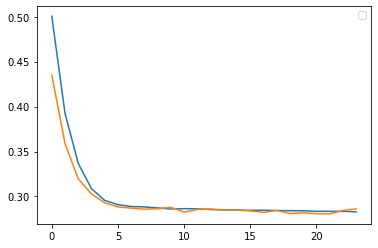

In [81]:
model_train.train(train_loader,val_loader,early_stopping=10)


Accuracy:  0.8949668231105357

Balanced Accuracy:  0.7955791366621512

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      5466
           1       0.69      0.16      0.26       713

    accuracy                           0.89      6179
   macro avg       0.80      0.58      0.60      6179
weighted avg       0.88      0.89      0.86      6179


Confusion Matrix:

            Total Data Samples: 6179 

            Class 0: 5466
            Class 1: 713 

Confusion matrix, without normalization
[[5414   52]
 [ 597  116]]




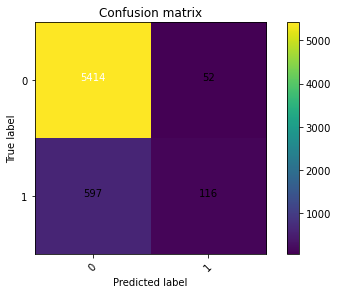

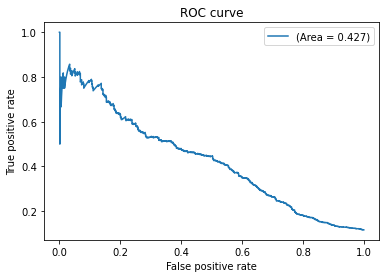

In [82]:
model_train.analyze(test_loader)